# OpenCV Text Detection Tests

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import pytesseract

126




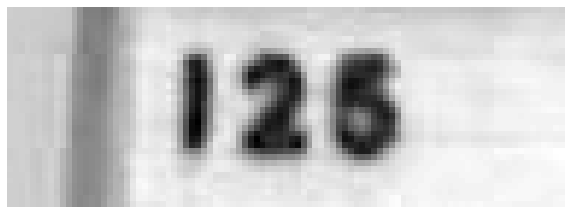

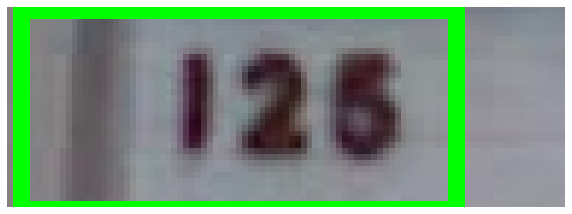

In [3]:
# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
 
# Read image from which text needs to be extracted
img = cv2.imread("dataset/house clear/10694.png")
 
plt.figure(figsize = [10, 10])
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap="gray")

# Preprocessing the image starts
 
# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
 
# Specify structure shape and kernel size. 
# Kernel size increases or decreases the area 
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect 
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
 
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
 
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                 cv2.CHAIN_APPROX_NONE)
 
# Creating a copy of image
im2 = img.copy()
 
# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
     
    # Open the file in append mode
    file = open("recognized.txt", "a")
     
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)

    plt.figure(figsize = [10, 10])
    plt.axis('off')
    plt.imshow(im2, cmap="gray")

    print(text)

In [4]:
def getNumberfromImg(img, num):
    # Mention the installed location of Tesseract-OCR in your system
    # HAL9000: E:/School/UIC/23-24/CS 415/cs415/final_proj/Tesseract-OCR/tesseract.exe
    # HAL9001: C:/Program Files/Tesseract-OCR/tesseract.exe
    pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
    
    # Read image from which text needs to be extracted
    img = cv2.imread(img)

    # Preprocessing the image starts
    
    # Convert the image to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Performing OTSU threshold
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

    plt.figure(figsize = [10, 10])
    plt.axis('off')
    plt.imshow(thresh1, cmap="gray")

    
    # Specify structure shape and kernel size. 
    # Kernel size increases or decreases the area 
    # of the rectangle to be detected.
    # A smaller value like (10, 10) will detect 
    # each word instead of a sentence.
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    
    # Applying dilation on the threshold image
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
    
    # Finding contours
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 
                                                    cv2.CHAIN_APPROX_NONE)
    
    # Creating a copy of image
    im2 = img.copy()
    
    # Looping through the identified contours
    # Then rectangular part is cropped and passed on
    # to pytesseract for extracting text from it
    # Extracted text is then written into the text file

    i = 0

    for cnt in contours:

        i += 1

        x, y, w, h = cv2.boundingRect(cnt)
        
        # Drawing a rectangle on copied image
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Cropping the text block for giving input to OCR
        cropped = im2[y:y + h, x:x + w]
        
        # Apply OCR on the cropped image
        text = pytesseract.image_to_string(cropped)

        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB), cmap="gray")

        printout = "Text from image %d, box %d: %s" % (num, i, text) 
        print(printout)

## Houses

Text from image 1, box 1: 


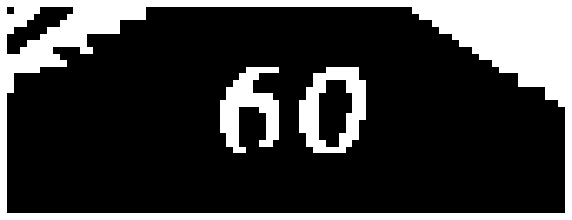

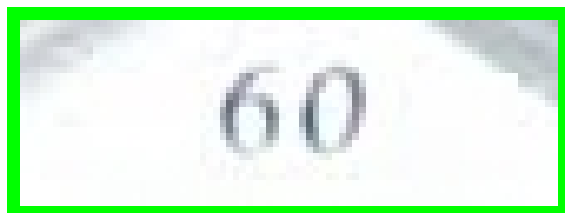

In [5]:
# Clear Test
getNumberfromImg("dataset/house clear/10519.png", 1)


Text from image 2, box 1: 126




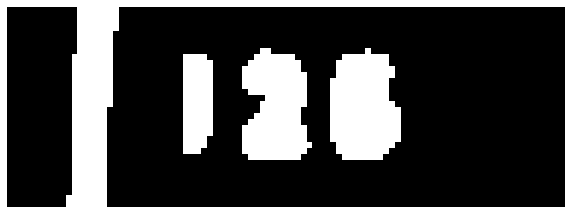

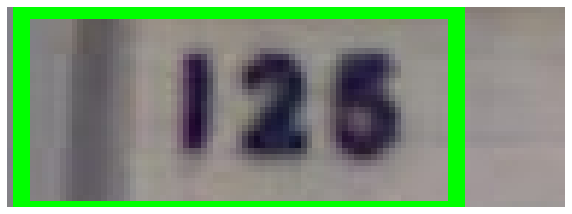

In [6]:
getNumberfromImg("dataset/house clear/10694.png", 2)

Text from image 3, box 1: 145




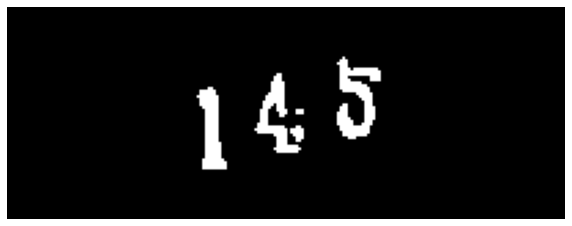

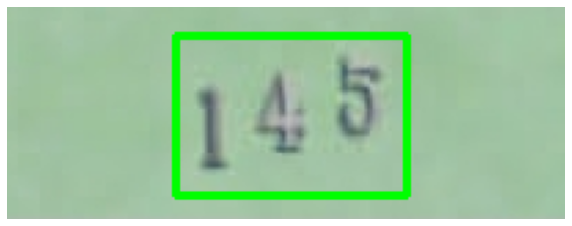

In [7]:
getNumberfromImg("dataset/house clear/10773.png", 3)

Text from image 4, box 1: 785




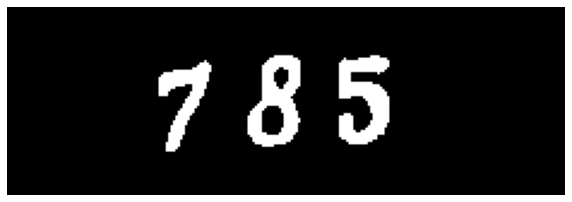

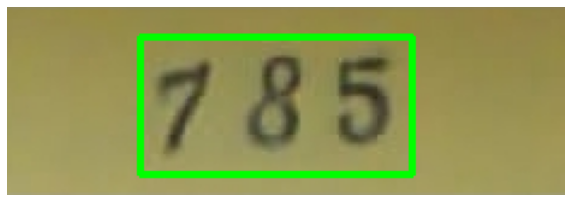

In [8]:
getNumberfromImg("dataset/house clear/11096.png", 4)

Text from image 5, box 1: 


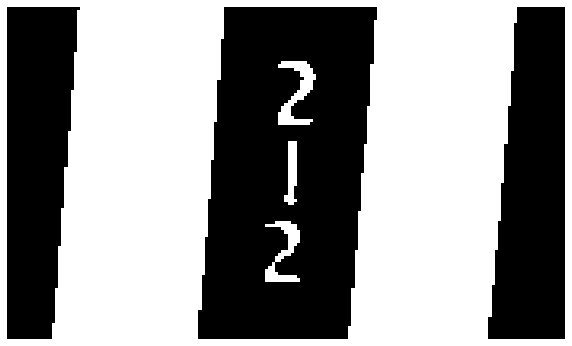

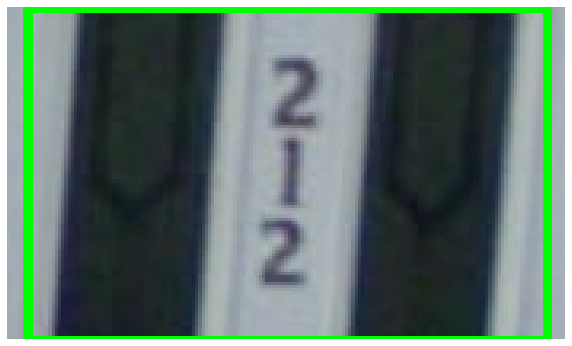

In [9]:
getNumberfromImg("dataset/house clear/11877.png", 5)

Text from image 6, box 1: 
Text from image 6, box 2: 


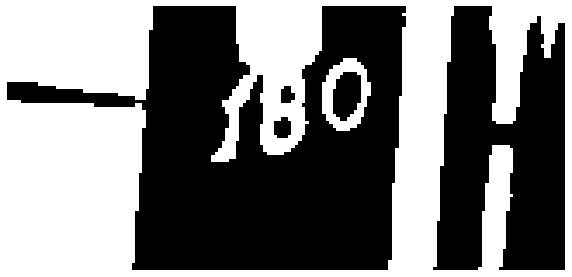

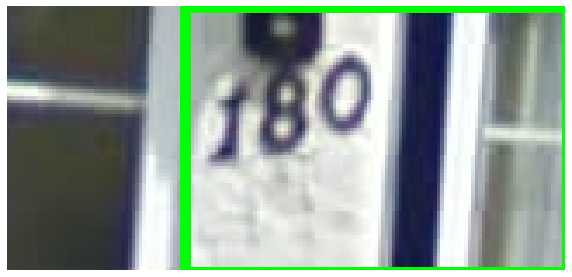

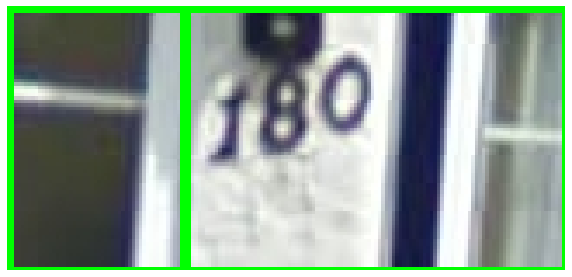

In [10]:
getNumberfromImg("dataset/house clear/12405.png", 6)

Text from image 7, box 1: 
Text from image 7, box 2: 
Text from image 7, box 3: 


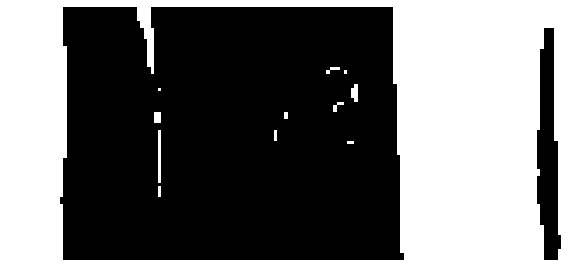

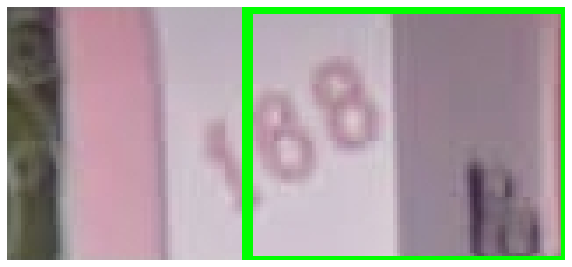

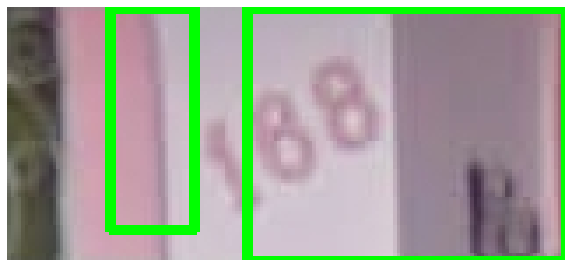

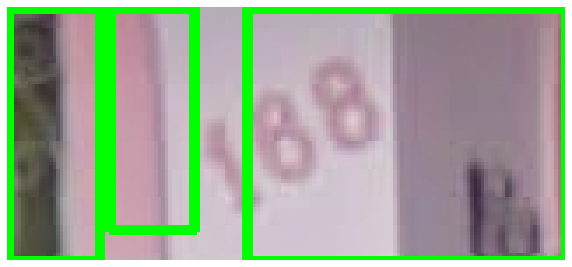

In [11]:
getNumberfromImg("dataset/house clear/12420.png", 7)

Text from image 1, box 1: 


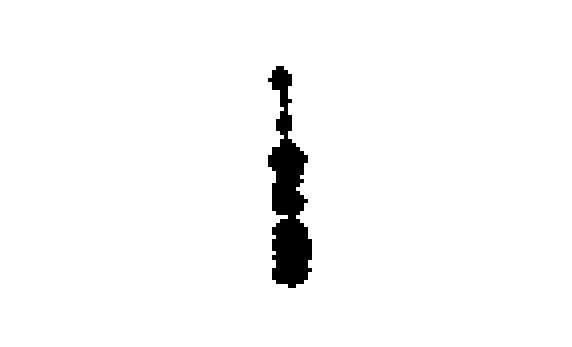

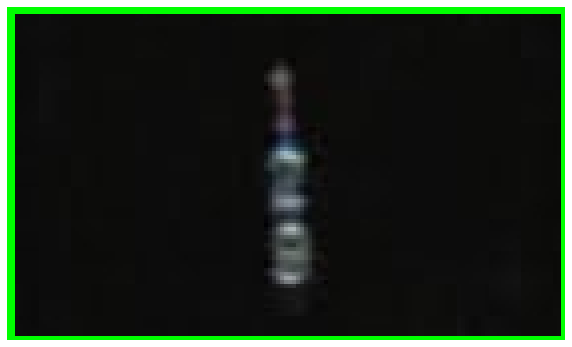

In [12]:
#Unclear
getNumberfromImg("dataset/house unclear/21.png", 1)

Text from image 2, box 1: 
Text from image 2, box 2: 
Text from image 2, box 3: 
Text from image 2, box 4: 


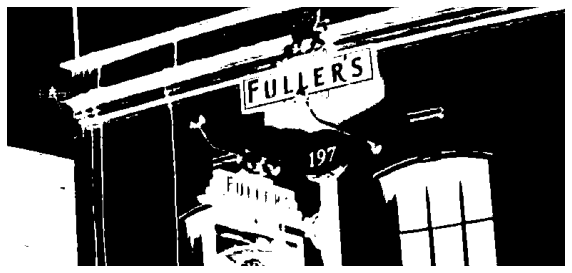

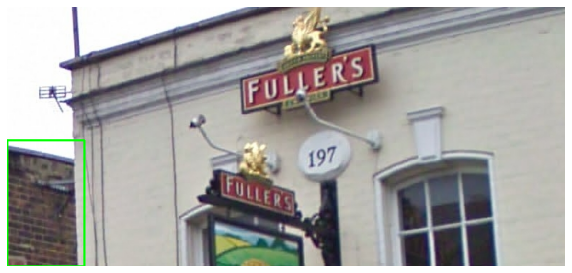

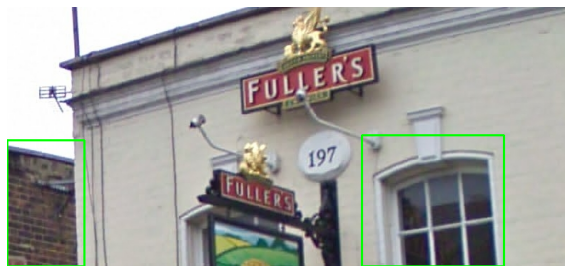

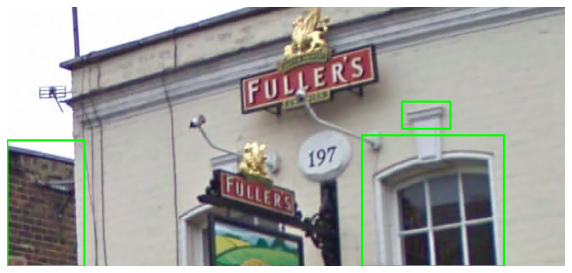

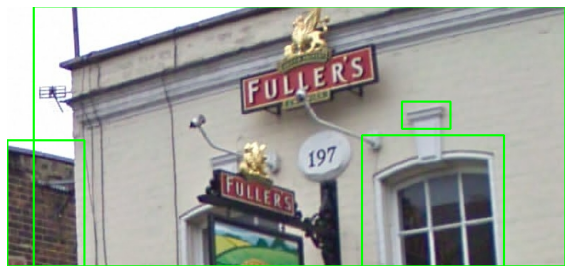

In [13]:
getNumberfromImg("dataset/house unclear/10712.png", 2)

Text from image 3, box 1: 


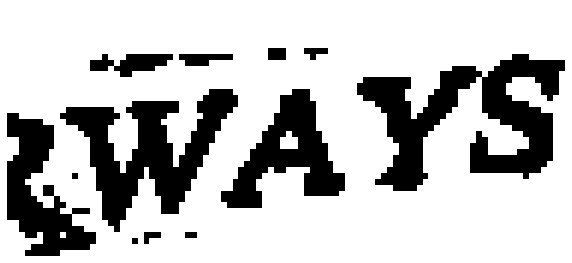

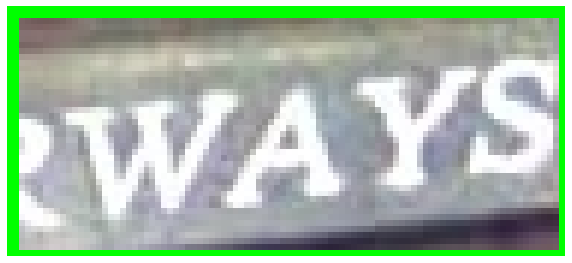

In [14]:
getNumberfromImg("dataset/house unclear/10732.png", 3)

Text from image 4, box 1: 


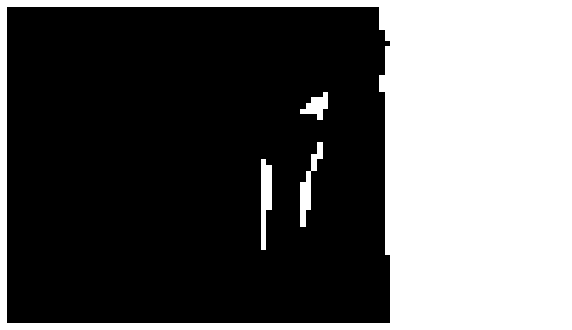

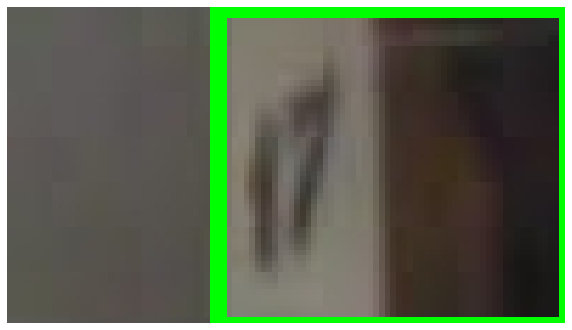

In [15]:
getNumberfromImg("dataset/house unclear/11615.png", 4)

Text from image 5, box 1: THE STRAND

Text from image 5, box 2: 


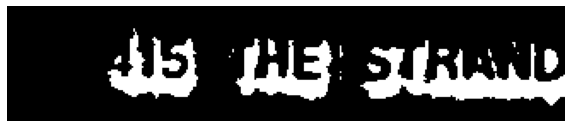

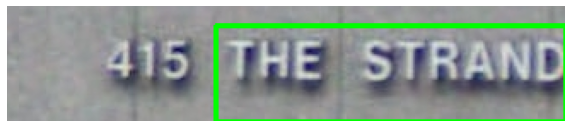

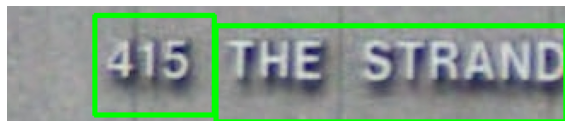

In [16]:
getNumberfromImg("dataset/house unclear/11891.png", 5)

Text from image 6, box 1: 


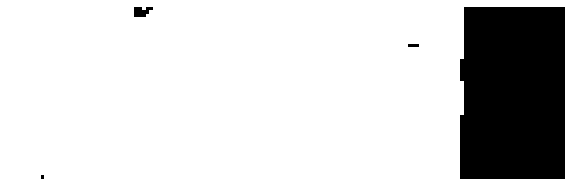

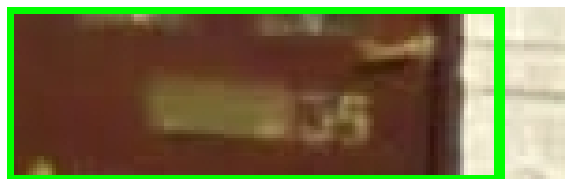

In [17]:
getNumberfromImg("dataset/house unclear/11930.png", 6)

Text from image 7, box 1: 


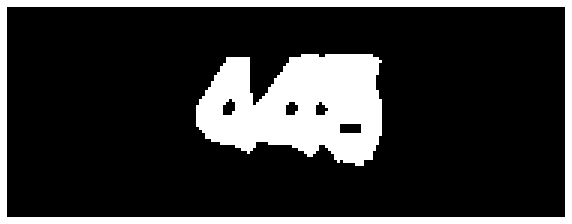

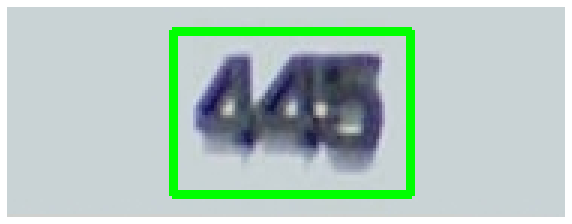

In [18]:
getNumberfromImg("dataset/house unclear/12504.png", 7)

## Cars

Text from image 1, box 1: MHO1AY8866)




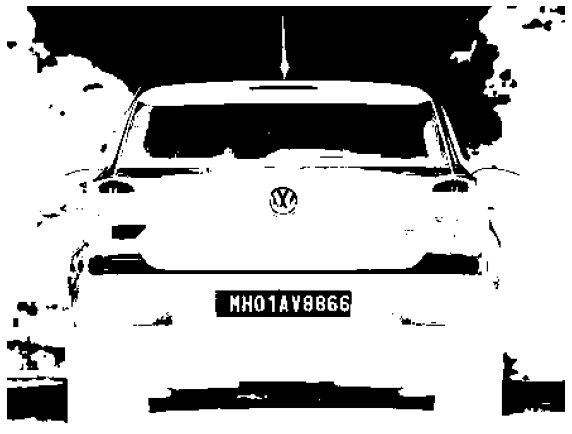

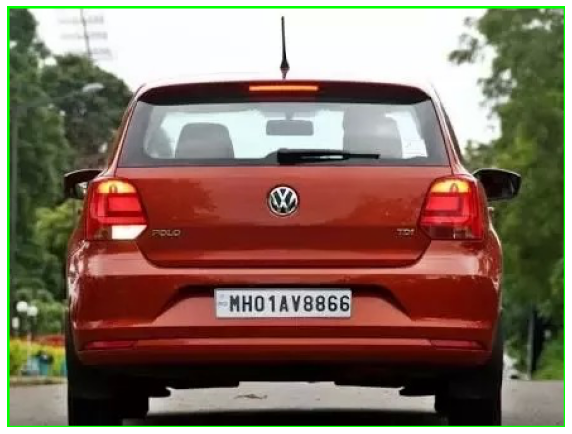

In [19]:
getNumberfromImg("dataset/car clear/cars9.png", 1)

Text from image 1, box 1: 
Text from image 1, box 2: 
Text from image 1, box 3: 
Text from image 1, box 4: 
Text from image 1, box 5: 
Text from image 1, box 6: 


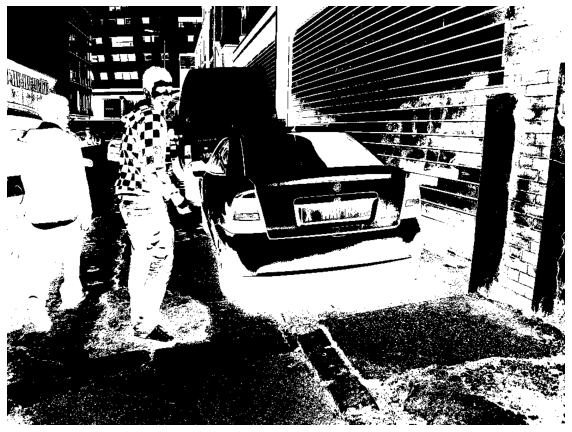

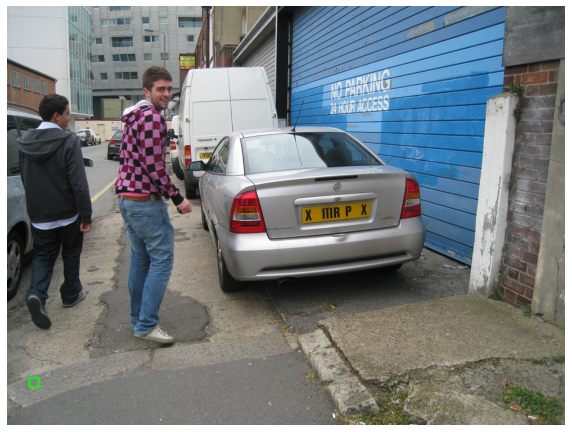

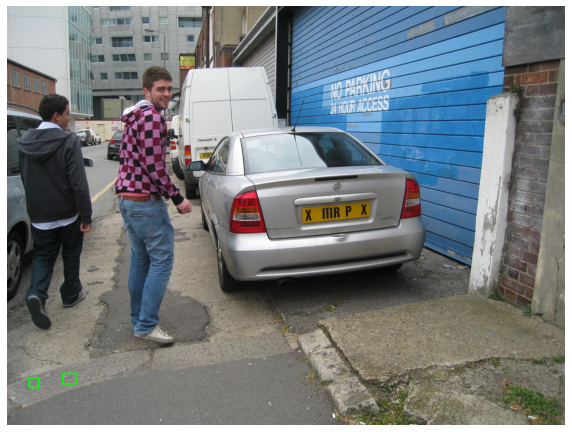

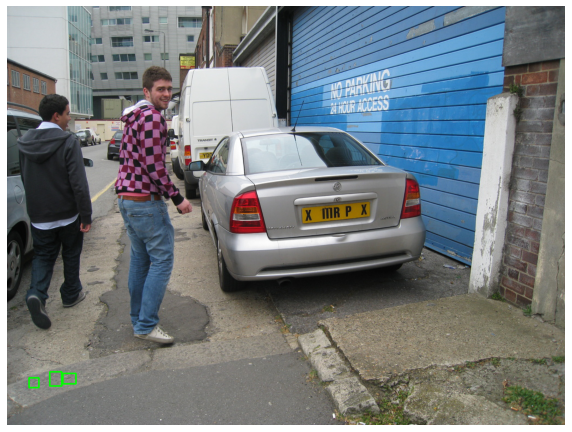

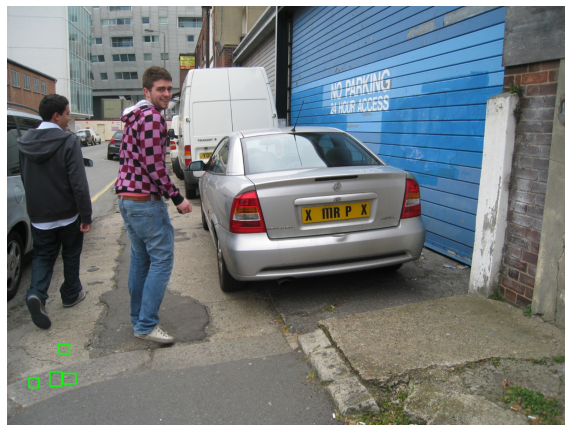

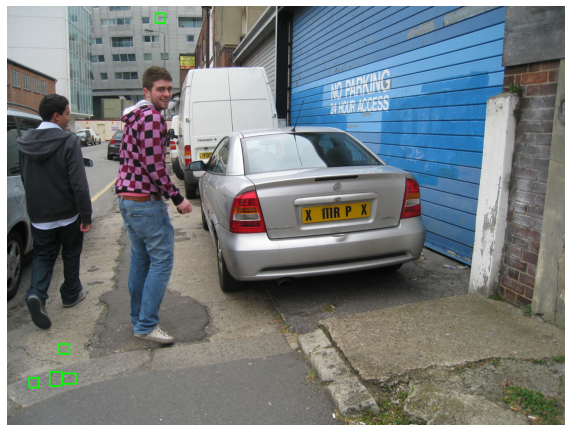

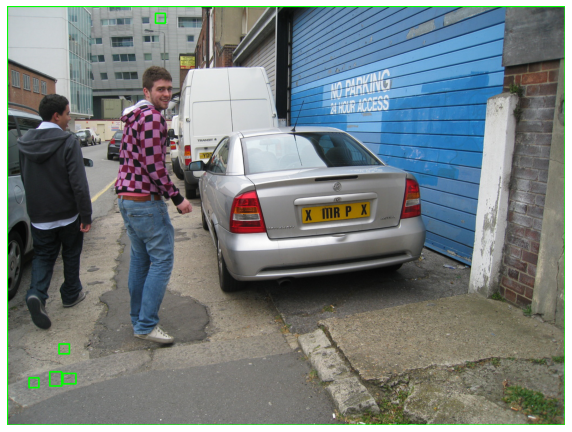

In [20]:
getNumberfromImg("dataset/car clear/car4.jpg", 1)